In [5]:
# Install and import dependencies
!pip install ucimlrepo

In [11]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from machinegnostics.models import train_test_split, LinearRegressor
from machinegnostics.metrics import robr2, root_mean_squared_error, gcorrelation, hc

# Fetch dataset (Wine Quality as example)
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets


In [12]:
gcor = gcorrelation(X, y)

# printing the results
print("G-Correlation Results:")
display(gcor.sort_values(ascending=False, by = 'quality'))

G-Correlation Results:


,quality
chlorides,0.982795
free_sulfur_dioxide,0.982450
citric_acid,0.981344
residual_sugar,0.980924
sulphates,0.980540
density,0.980064
fixed_acidity,0.978046
volatile_acidity,0.976912
pH,0.973828
alcohol,0.970563


In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_seed=42)

# Ensure targets are 1D arrays
y_train = np.array(y_train).squeeze()
y_test = np.array(y_test).squeeze()

# Fit machinegnostics LinearRegression
lr = LinearRegressor()
lr.fit(X_train, y_train)

# Predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

Train Robust R2: 0.2919
Test Robust R2: 0.2680
Train RMSE: 0.7419
Test RMSE: 0.7218
Train HC: 0.0571
Test HC: 0.0551


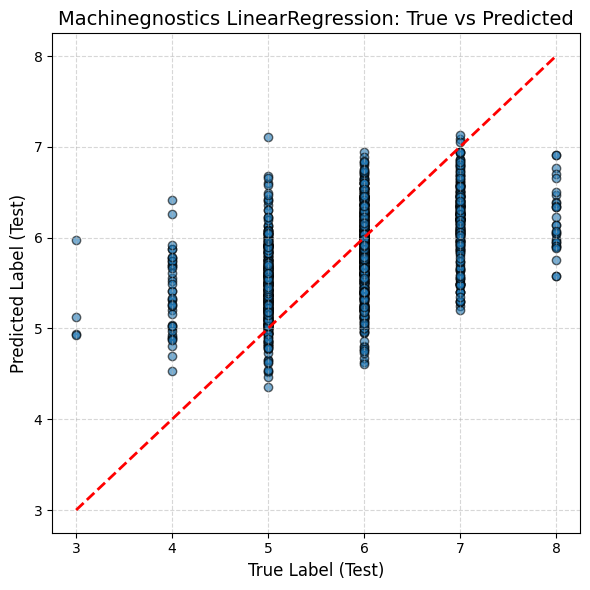

In [14]:
# Evaluate
train_r2 = robr2(y_train, y_train_pred)
test_r2 = robr2(y_test, y_test_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
hc_value_train = hc(y_train, y_train_pred)
hc_value_test = hc(y_test, y_test_pred)

print(f"Train Robust R2: {train_r2:.4f}")
print(f"Test Robust R2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Train HC: {hc_value_train:.4f}")
print(f"Test HC: {hc_value_test:.4f}")

# Optional: Plot true vs predicted for test set
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='tab:blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Label (Test)', fontsize=12)
plt.ylabel('Predicted Label (Test)', fontsize=12)
plt.title('Machinegnostics LinearRegression: True vs Predicted', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()